<a href="https://colab.research.google.com/github/jocode/machine-learning-python/blob/master/Preparaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importamos las librerías
import numpy as np
import pandas as pd   # Pandas funciona casi igual de numpy y extiende las funcionalidades
import matplotlib.pyplot as plt
import seaborn as sb   # Es una sobrecapa de matplotlib que permite hacer gráficos estadísticos

In [0]:
# Esta línea permite que los gráficos sean renderizados directamente en nuestro Notebook
## Carguemos en un pandas dataframe nuestra base de datos
%matplotlib inline

# Carguemos en un pandas datarame nuestra base de datos

**`pd.read_csv`** es el método que nos permite importar los datos desde un CSV y cargarlos en un **DataFrame**, que es la estructura de base de Pandas.



In [191]:
# Cargar el dataset desde drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
movies = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/machine_learning_python/peliculas.csv', encoding='utf-8')

In [193]:
type(movies)

pandas.core.frame.DataFrame

In [194]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [195]:
# Cuantas líneas y columnas tiene nuestro dataframe
### Un dataframe es una estructura de datos que se compone de los elementos siguientes
movies.shape

(5043, 19)

In [196]:
# Visualizar las columnas
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [197]:
# La cantidad de filas del array
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [198]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [199]:
# Acceder al registro o la fila de la película en la posición número 10 (Se obtienen los features)
linea = movies.loc[10, :]
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [200]:
# Obtiene la columna movie_title
movies.loc[:,'movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

# Intentemos inspeccionar nuestros datos y entenderlos mejor

In [201]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

A diferencia de Numpy, Pandas permite cargar no solo datos numericos pero tambien **datos de texto** que vemos por ejemplo en las columnas de actores y **mezclar distintos tipos de datos**.
- `int64` y `float64` corresponden a los mismos dtypes de Numpy
- `object` es el dtype que permite manejar datos de texto

In [202]:
# Columnas númericas y columnas de texto
#movies.dtypes
movies.dtypes == float

# type(movies.dtypes)  # pandas.core.series.Series

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [203]:
movies.dtypes == int

movie_title                  False
title_year                   False
color                        False
aspect_ratio                 False
duration                     False
language                     False
country                      False
duration.1                   False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [204]:
(movies.dtypes == float) | (movies.dtypes == int)

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [205]:
# Serie de booleanos
movies.dtypes == object  # Object es como pandas maneja las columnas de texto

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [206]:
# Lista de columnas con texto y de columnas con números
numericas = (movies.dtypes == float) | (movies.dtypes == int)
numericas

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [207]:
numericas.index

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [208]:
for item in numericas.index:
  print(item)

movie_title
title_year
color
aspect_ratio
duration
language
country
duration.1
genres
content_rating
plot_keywords
director_name
actor_1_name
actor_2_name
actor_3_name
cast_total_facebook_likes
budget
imdb_score
gross


In [209]:
for item in numericas:
  print(item)

False
True
False
True
True
False
False
True
False
False
False
False
False
False
False
True
True
True
True


In [210]:
# Se crea una lista con los nombres de las columnas que contienen sólo números
columnas_numericas = [columna for columna in numericas.index if numericas[columna]]
columnas_numericas # Imprime las columnas númericas

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [211]:
# Se guardan la columnas que continen sólo texto
texto = (movies.dtypes == object)
texto

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [212]:
# Se crea una lista con los nombres de las columnas que contienen sólo texto
columnas_texto = [columna for columna in texto.index if texto[columna]]
columnas_texto

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [0]:
# Mostramos las columnas numéricas del dataset
movies_num = movies[columnas_numericas]

In [214]:
# Estadísticas de las columnas numéricas
movies_num.describe()
# mean => Es el promedio
# std => Desviación estandar
# Los demás son los cuartiles

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


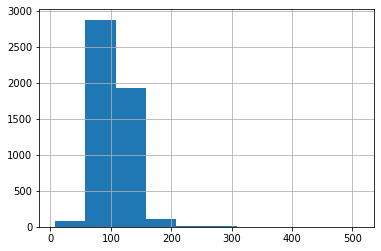

In [215]:
movies_num['duration'].hist()

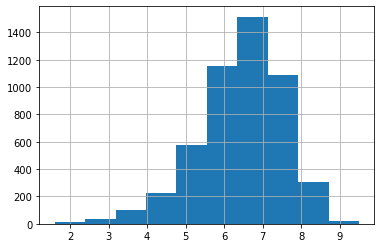

In [216]:
movies_num['imdb_score'].hist()

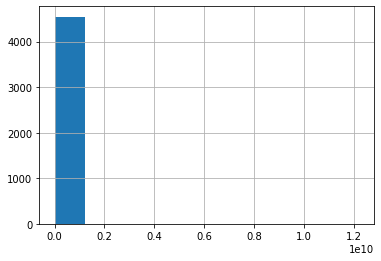

In [217]:
movies_num['budget'].hist()

Para poder debuggear esta situación utilizaremos una tecnica muy tipica de pandas que se llama **`boolean filtering`**. Basicamente construimos una serie de booleanos con el mismo indice que nuestro dataframe (la serie clasicamente la llamaremos mask).

In [218]:
# Películas con presupuesto mayores a 1 billon
## con .value_counts()    Podemos saber la cantidad de películas con ese presupuesto
mask = (movies_num['budget'] > 1e9)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: budget, Length: 5043, dtype: bool

In [219]:
# Muestra todo el contenido de las películas con el presupuesto superior a 1 billon (1e9)
movies[mask]
# Esto sucede porque la persona que hizo tomó los datos, no consideró la moneda en la cual se habían hecho las películas


,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


Tenemos un problema de limpieza de los datos. La BDD fue creada sin diferenciar:
- La moneda en la que se ingresaba el presupuesto y el ingreso.
- La zona (país/mundial) en la que se registro el ingreso

In [0]:
# Busco las películas mejor valoradas, con una calificacion 9 o superior
mask_better = (movies['imdb_score'] >= 9)  # .value_counts()

In [221]:
movies[mask_better]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
66,The Dark Knight,2008.0,Color,2.35,152.0,English,USA,152.0,Action|Crime|Drama|Thriller,PG-13,based on comic book|dc comics|psychopath|star ...,Christopher Nolan,Christian Bale,Heath Ledger,Morgan Freeman,57802,185000000.0,9.0,533316061.0
1937,The Shawshank Redemption,1994.0,Color,1.85,142.0,English,USA,142.0,Crime|Drama,R,escape from prison|first person narration|pris...,Frank Darabont,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,13495,25000000.0,9.3,28341469.0
2765,Towering Inferno,NaN,Color,1.33,65.0,English,Canada,65.0,Comedy,NaN,NaN,John Blanchard,Martin Short,Andrea Martin,Joe Flaherty,1125,NaN,9.5,NaN
2824,Dekalog,NaN,Color,1.33,55.0,Polish,Poland,55.0,Drama,TV-MA,meaning of life|moral challenge|morality|searc...,NaN,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,25,NaN,9.1,447093.0
2837,The Godfather: Part II,1974.0,Color,1.85,220.0,English,USA,220.0,Crime|Drama,R,1950s|corrupt politician|lake tahoe nevada|mel...,Francis Ford Coppola,Robert De Niro,Al Pacino,Robert Duvall,39960,13000000.0,9.0,57300000.0
3207,Dekalog,NaN,Color,1.33,55.0,Polish,Poland,55.0,Drama,TV-MA,meaning of life|moral challenge|morality|searc...,NaN,Krystyna Janda,Olaf Lubaszenko,Olgierd Lukaszewicz,25,NaN,9.1,447093.0
3466,The Godfather,1972.0,Color,1.85,175.0,English,USA,175.0,Crime|Drama,R,crime family|mafia|organized crime|patriarch|r...,Francis Ford Coppola,Al Pacino,Marlon Brando,Robert Duvall,28122,6000000.0,9.2,134821952.0
3481,Fargo,NaN,Color,1.78,53.0,English,USA,53.0,Crime|Drama|Thriller,TV-MA,anthology|death|insurance salesman|minnesota|p...,NaN,Kirsten Dunst,Adam Goldberg,Oliver Platt,19949,NaN,9.0,NaN
4409,Kickboxer: Vengeance,2016.0,NaN,NaN,90.0,NaN,USA,90.0,Action,NaN,NaN,John Stockwell,Matthew Ziff,T.J. Storm,Sam Medina,261818,17000000.0,9.1,NaN


In [222]:

# Importar BBDD thenumbers.com

## Ahora manejaremos los datos faltantes (nulos o NaN).

pd.read_csv('drive/My Drive/Colab Notebooks/datasets/machine_learning_python/thenumbers.csv')

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises
...,...,...,...,...,...,...,...,...
4336,5157,The Mongol King,900,http://www.the-numbers.com/movie/Mongol-King-T...,7000,1/1/2004,900,The Mongol King
4337,5160,Signed Sealed Delivered,0,http://www.the-numbers.com/movie/Signed-Sealed...,5000,9/29/2015,0,Signed Sealed Delivered
4338,5161,Shanghai Calling,10443,http://www.the-numbers.com/movie/Shanghai-Call...,3967,2/15/2013,10443,Shanghai Calling
4339,5162,A Plague So Pleasant,0,http://www.the-numbers.com/movie/Plague-So-Ple...,1400,9/29/2015,0,A Plague So Pleasant


In [0]:
financials = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/machine_learning_python/thenumbers.csv', encoding='utf-8')

In [0]:
financials = financials[['movie_title', 'production_budget', 'worldwide_gross']]

In [225]:
financials.shape

(4341, 3)

In [226]:
movies.shape

(5043, 19)

In [227]:
movies['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [0]:
# Concatenamos los datos numéricos de (movies_num) con el (nombre de la película)
movies_num = pd.concat([movies_num, movies['movie_title']], axis=1)
# La concatenacion por defecto se hace línea por línea, para hacerla columna por columna, usamos (axis=1)

In [229]:
movies_num

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN,Signed Sealed Delivered
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN,The Following
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN,A Plague So Pleasant
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0,Shanghai Calling


In [230]:
# Se hace el merge con las 2 bases de datos  (financial) y (movies)
pd.merge(financials, movies_num, on='movie_title', how='left')

# La llave es movie_title  y el join será left (izquierdo), de esta manera sólo guardará las llaves que se encuentren en financials

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...,...,...
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN
4381,Signed Sealed Delivered,5000,0,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0
4383,A Plague So Pleasant,1400,0,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN


In [0]:
movies_v2 = pd.merge(financials, movies_num, on='movie_title', how='left')

In [232]:
movies_v2.shape

(4385, 11)

# Ahora solucionaremos el problema de los datos faltantes (nulos o NaN)


Los datos faltantes generan problemas con muchos algoritmos de ML. Es por eso que existen distintas estrategias para lidiar con ellos.

In [233]:
# Vemos la documentacion de pandas Series.value_counts
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.count: Number 

In [234]:
movies_v2.notnull().apply(pd.Series.value_counts)
# Los false indican los datos faltantes
# La función apply hace un for loop y con pd.Series.value_counts nos indica la cantidad de datos nulos y completos por cada columna

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [235]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [0]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))

In [237]:
available

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,False,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,False,True,False,True,True,False,True,True,False


In [238]:
# Revisa las columnas en cada una de los registros o líneas si hay valores faltantes
available.all(axis=1).value_counts()

# Con los que obtenemos 977 líneas con valores falsos

True     3408
False     977
dtype: int64

> No podemos entrenar nuestro algoritmo con datos cuya variable objetivo no esta definida o sea nula (valor falso). Eliminemos esas líneas.

In [239]:
# Obtenemos los datos disponibles en la variable objetivo (worldwide_gross)
mask_completes = available['worldwide_gross']
mask_completes

0        True
1        True
2        True
3        True
4        True
        ...  
4380     True
4381    False
4382     True
4383    False
4384     True
Name: worldwide_gross, Length: 4385, dtype: bool

In [0]:
movies_v2 = movies_v2[mask_completes]

In [241]:
# Ya con esto nuestra variable objetivo está completamente limpia
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

> En el caso de las features que no son la variable objetivo una mejor solución para lidiar con los datos faltantes es **remplazar estos datos por otros que sean manejables** y no afecten la calidad de las predicciones. 

* _La estrategia más comun es utilizar la media de todos los ejemplos para la feature dada._ Usando sklearn con la estrategia `strategy='mean'`

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [243]:
movies_v2

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...,...,...
4378,Primer,7000,841926,2004.0,1.85,77.0,77.0,368,7000.0,7.0,424760.0
4379,Cavite,7000,71644,2005.0,NaN,80.0,80.0,0,7000.0,6.3,70071.0
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [0]:
# Eliminamos las columnas de movie_title y el duplicado de duration
movies_v2 = movies_v2.drop('movie_title', axis=1)

In [0]:
movies_v2 = movies_v2.drop('duration.1', axis=1)

In [246]:
movies_v2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [0]:
values = imputer.fit_transform(movies_v2)

In [250]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [251]:
movies_v2.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [0]:
# Creamos el dataframe para los nuevos datos asignados en la media
X = pd.DataFrame(values)

In [0]:
X.columns = movies_v2.columns

In [0]:
X.index = movies_v2.index

In [255]:
# Estos ya sería los datos limpios que se tendrían para trabajar en la siguiente etapa
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [0]:
# Guardamos los resultados obtenidos, recomendado colocar index=False
X.to_csv('drive/My Drive/Colab Notebooks/datasets/machine_learning_python/intermediate_results/X.csv', index=False)